# Logistic regression for binary classification

## import libraries

In [3]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

## load data

In [4]:
directory_data  = '/Users/lyuwan-u/Desktop/2021-2/assignment-machine-learning-project/assignment02'
filename_data   = 'assignment_02_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x = data['x']
y = data['y']

print('size of x (image) :', x.shape)
print('size of y (label) :', y.shape)

print('number of image :', x.shape[0])
print('height of image :', x.shape[1])
print('width of image :', x.shape[2])
im_0    = x[0,:,:]
im_1    = x[1,:,:]
label_0 = y[0]
label_1 = y[1]




size of x (image) : (2, 28, 28)
size of y (label) : (2,)
number of image : 2
height of image : 28
width of image : 28


## plot data

In [5]:
def plot_data2(title1, data1, title2, data2):

    fig = plt.figure(figsize=(8,4))

    rows = 1
    cols = 2

    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.set_title(title1)
    ax1.imshow(data1, cmap='gray', vmin=0, vmax=1)

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.set_title(title2)
    ax2.imshow(data2, cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

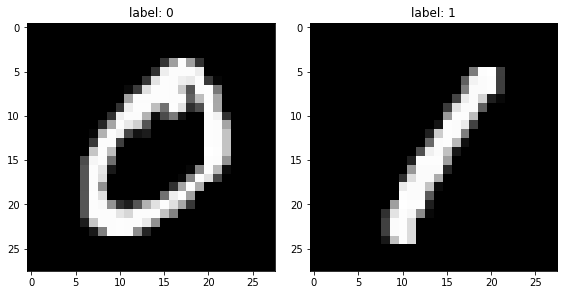

In [6]:
plot_data2('label: 0', im_0, 'label: 1', im_1)

## convert gray scale image to color

In [7]:
im_0_red    = np.zeros((im_0.shape[0], im_0.shape[1], 3))
im_0_green  = np.zeros((im_0.shape[0], im_0.shape[1], 3))
im_0_blue   = np.zeros((im_0.shape[0], im_0.shape[1], 3))

im_1_red    = np.zeros((im_1.shape[0], im_1.shape[1], 3))
im_1_green  = np.zeros((im_1.shape[0], im_1.shape[1], 3))
im_1_blue   = np.zeros((im_1.shape[0], im_1.shape[1], 3))

im_0_red[:,:,0]     = im_0
im_0_green[:,:,1]   = im_0
im_0_blue[:,:,2]    = im_0

im_1_red[:,:,0]     = im_1
im_1_green[:,:,1]   = im_1
im_1_blue[:,:,2]    = im_1

print(im_0_red.shape)
print(im_0_green.shape)
print(im_0_blue.shape)

print(im_1_red.shape)
print(im_1_green.shape)
print(im_1_blue.shape)


(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


## plot color data

In [8]:
def plot_data_color3(title1, data1, title2, data2, title3, data3):

    fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(12, 4))

    axes[0].imshow(data1, vmin=0, vmax=1)
    axes[0].set(title=title1)
    
    axes[1].imshow(data2, vmin=0, vmax=1)
    axes[1].set(title=title2)
    
    axes[2].imshow(data3, vmin=0, vmax=1)
    axes[2].set(title=title3)

    plt.show()


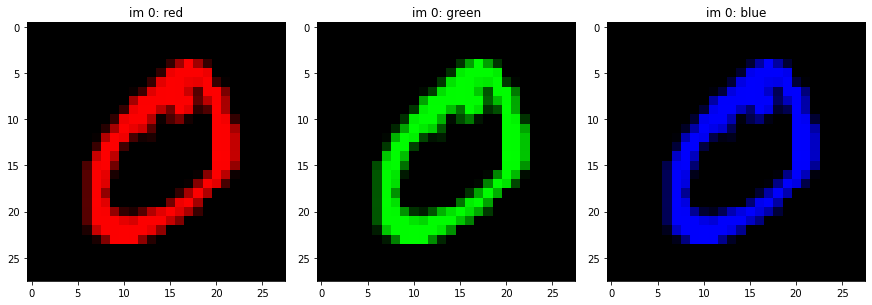

In [9]:
plot_data_color3('im 0: red', im_0_red, 'im 0: green', im_0_green, 'im 0: blue', im_0_blue)

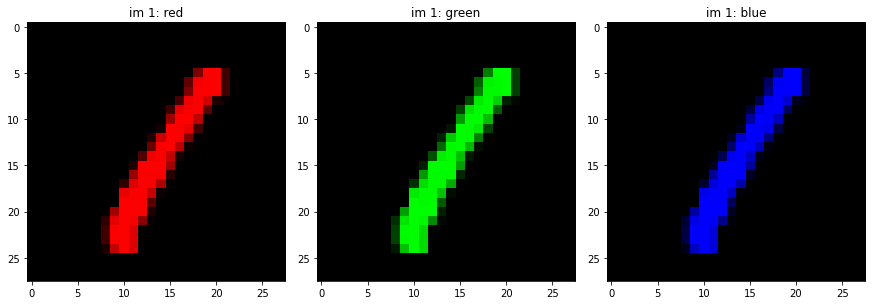

In [10]:
plot_data_color3('im 1: red', im_1_red, 'im 1: green', im_1_green, 'im 1: blue', im_1_blue)

## linear layer

In [11]:
def layer_linear(input, weight):
    # fill in the function body
    output = np.dot(input,weight.T)
    # -------------------------
    return output

## [git commit # 01] % git commit -a -m "complete the function for linear layer"

## activation function : Sigmoid

In [12]:
def activation_sigmoid(input):
    # fill in the function body
    output = 1/(1+np.exp(-input))
    # -------------------------
    return output

## [git commit # 02] % git commit -a -m "complete the function for the sigmoid activation"

## forward propagation 

In [13]:
def propagation_forward(input, weight):
    
    # fill in the function body
    output      = layer_linear(input,weight)
    prediction  = activation_sigmoid(output)
    # -------------------------

    return prediction

## [git commit # 03] % git commit -a -m "complete the function for the forward propagation"

## compute loss function

In [14]:
def compute_loss(input, weight, label):

    # fill in the function body
    prediction      = propagation_forward(input,weight)
    loss            = np.sum(-1 * (label * np.log(prediction) + (1-y) * np.log(1-prediction)))
    loss_average    = loss / len(input)
    # -------------------------

    return loss_average

## [git commit # 04] % git commit -a -m "complete the function for the loss"

## compute gradient

In [15]:
def compute_gradient(input, weight, label):

    # fill in the function body

    prediction  = propagation_forward(input,weight)
    residual    = (prediction - label).dot(input)
    gradient    = residual / len(input)
    # -------------------------

    return gradient

## [git commit # 05] % git commit -a -m "complete the function for the computation of gradient"

## initialize weight

In [16]:
weight  = np.ones(np.prod(im_0.shape))
weight  = weight * 0.001

vector_0    = np.matrix.flatten(im_0)
vector_1    = np.matrix.flatten(im_1)

input   = [vector_0, vector_1]
label   = y

## hyper-parameters

In [17]:
number_iteration    = 1000
learning_rate       = 0.01

## gradient descent

In [18]:
loss_iteration      = np.zeros(number_iteration)
pred_0_iteration    = np.zeros(number_iteration) 
pred_1_iteration    = np.zeros(number_iteration) 

for i in range(number_iteration):

    # fill in the function body
    weight  = weight - learning_rate * compute_gradient(input,weight,label)
    loss    = compute_loss(input,weight,label)
    pred    = propagation_forward(input,weight)
    # -------------------------

    loss_iteration[i]   = loss
    pred_0_iteration[i] = pred[0]
    pred_1_iteration[i] = pred[1]
    
    print('iteration = %4d, loss = %5.5f' % (i, loss))

iteration =    0, loss = 0.63294
iteration =    1, loss = 0.57033
iteration =    2, loss = 0.51769
iteration =    3, loss = 0.47299
iteration =    4, loss = 0.43465
iteration =    5, loss = 0.40145
iteration =    6, loss = 0.37246
iteration =    7, loss = 0.34696
iteration =    8, loss = 0.32439
iteration =    9, loss = 0.30429
iteration =   10, loss = 0.28629
iteration =   11, loss = 0.27010
iteration =   12, loss = 0.25547
iteration =   13, loss = 0.24219
iteration =   14, loss = 0.23011
iteration =   15, loss = 0.21907
iteration =   16, loss = 0.20895
iteration =   17, loss = 0.19965
iteration =   18, loss = 0.19108
iteration =   19, loss = 0.18316
iteration =   20, loss = 0.17582
iteration =   21, loss = 0.16900
iteration =   22, loss = 0.16265
iteration =   23, loss = 0.15674
iteration =   24, loss = 0.15120
iteration =   25, loss = 0.14603
iteration =   26, loss = 0.14117
iteration =   27, loss = 0.13660
iteration =   28, loss = 0.13231
iteration =   29, loss = 0.12826
iteration 

## [git commit # 06] % git commit -a -m "complete the function for the gradient descent"

## plot learning curve

In [19]:
def plot_curve(title, data):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(data, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

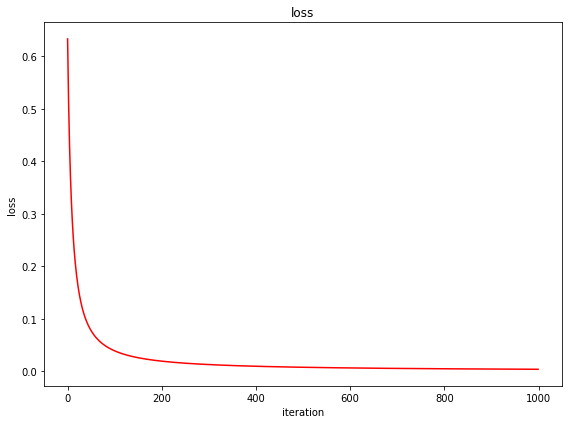

In [20]:
plot_curve('loss', loss_iteration)

## plot prediction values

In [21]:
def plot_curve2(title, data1, label1, data2, label2):


    fig = plt.figure(figsize=(8,6))
    plt.title(title)

    plt.plot(data1, '-', color='blue', label=label1)
    plt.plot(data2, '-', color='red', label=label2)
    plt.legend()
    plt.tight_layout()

    plt.show()

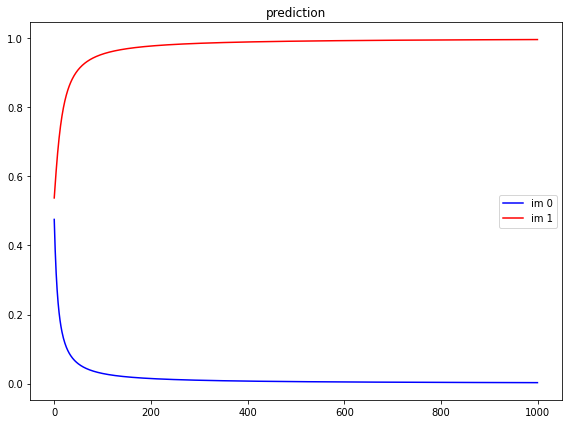

In [22]:
plot_curve2('prediction', pred_0_iteration, 'im 0', pred_1_iteration, 'im 1')

## given iterations at which the values are presented

In [23]:
iter0   = 0
iter1   = 100
iter2   = 200
iter3   = 300
iter4   = 400
iter5   = 500
iter6   = 600
iter7   = 700
iter8   = 800
iter9   = 900


## loss values

In [24]:
print('iteration = %4d, loss = %12.10f' % (iter0, loss_iteration[iter0]))
print('iteration = %4d, loss = %12.10f' % (iter1, loss_iteration[iter1]))
print('iteration = %4d, loss = %12.10f' % (iter2, loss_iteration[iter2]))
print('iteration = %4d, loss = %12.10f' % (iter3, loss_iteration[iter3]))
print('iteration = %4d, loss = %12.10f' % (iter4, loss_iteration[iter4]))
print('iteration = %4d, loss = %12.10f' % (iter5, loss_iteration[iter5]))
print('iteration = %4d, loss = %12.10f' % (iter6, loss_iteration[iter6]))
print('iteration = %4d, loss = %12.10f' % (iter7, loss_iteration[iter7]))
print('iteration = %4d, loss = %12.10f' % (iter8, loss_iteration[iter8]))
print('iteration = %4d, loss = %12.10f' % (iter9, loss_iteration[iter9]))

iteration =    0, loss = 0.6329350216
iteration =  100, loss = 0.0387987005
iteration =  200, loss = 0.0192110507
iteration =  300, loss = 0.0127217113
iteration =  400, loss = 0.0094994077
iteration =  500, loss = 0.0075760710
iteration =  600, loss = 0.0062989058
iteration =  700, loss = 0.0053894604
iteration =  800, loss = 0.0047090685
iteration =  900, loss = 0.0041809548


## prediction values for im_0

In [25]:
print('iteration = %4d, pred im0 = %12.10f' % (iter0, pred_0_iteration[iter0]))
print('iteration = %4d, pred im0 = %12.10f' % (iter1, pred_0_iteration[iter1]))
print('iteration = %4d, pred im0 = %12.10f' % (iter2, pred_0_iteration[iter2]))
print('iteration = %4d, pred im0 = %12.10f' % (iter3, pred_0_iteration[iter3]))
print('iteration = %4d, pred im0 = %12.10f' % (iter4, pred_0_iteration[iter4]))
print('iteration = %4d, pred im0 = %12.10f' % (iter5, pred_0_iteration[iter5]))
print('iteration = %4d, pred im0 = %12.10f' % (iter6, pred_0_iteration[iter6]))
print('iteration = %4d, pred im0 = %12.10f' % (iter7, pred_0_iteration[iter7]))
print('iteration = %4d, pred im0 = %12.10f' % (iter8, pred_0_iteration[iter8]))
print('iteration = %4d, pred im0 = %12.10f' % (iter9, pred_0_iteration[iter9]))

iteration =    0, pred im0 = 0.4751157638
iteration =  100, pred im0 = 0.0294013919
iteration =  200, pred im0 = 0.0147619719
iteration =  300, pred im0 = 0.0098246200
iteration =  400, pred im0 = 0.0073549633
iteration =  500, pred im0 = 0.0058749365
iteration =  600, pred im0 = 0.0048896397
iteration =  700, pred im0 = 0.0041867921
iteration =  800, pred im0 = 0.0036602851
iteration =  900, pred im0 = 0.0032512118


## prediction values for im_1

In [26]:
print('iteration = %4d, pred im1 = %12.10f' % (iter0, pred_1_iteration[iter0]))
print('iteration = %4d, pred im1 = %12.10f' % (iter1, pred_1_iteration[iter1]))
print('iteration = %4d, pred im1 = %12.10f' % (iter2, pred_1_iteration[iter2]))
print('iteration = %4d, pred im1 = %12.10f' % (iter3, pred_1_iteration[iter3]))
print('iteration = %4d, pred im1 = %12.10f' % (iter4, pred_1_iteration[iter4]))
print('iteration = %4d, pred im1 = %12.10f' % (iter5, pred_1_iteration[iter5]))
print('iteration = %4d, pred im1 = %12.10f' % (iter6, pred_1_iteration[iter6]))
print('iteration = %4d, pred im1 = %12.10f' % (iter7, pred_1_iteration[iter7]))
print('iteration = %4d, pred im1 = %12.10f' % (iter8, pred_1_iteration[iter8]))
print('iteration = %4d, pred im1 = %12.10f' % (iter9, pred_1_iteration[iter9]))

iteration =    0, pred im1 = 0.5372495936
iteration =  100, pred im1 = 0.9533672143
iteration =  200, pred im1 = 0.9767250520
iteration =  300, pred im1 = 0.9845503666
iteration =  400, pred im1 = 0.9884505421
iteration =  500, pred im1 = 0.9907828605
iteration =  600, pred im1 = 0.9923333612
iteration =  700, pred im1 = 0.9934382832
iteration =  800, pred im1 = 0.9942653695
iteration =  900, pred im1 = 0.9949076094


In [27]:
def function_result_01(title1,data1,title2,data2):

    fig = plt.figure(figsize=(8,4))

    rows = 1
    cols = 2

    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.set_title(title1)
    ax1.imshow(data1, cmap='gray', vmin=0, vmax=1)

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.set_title(title2)
    ax2.imshow(data2, cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

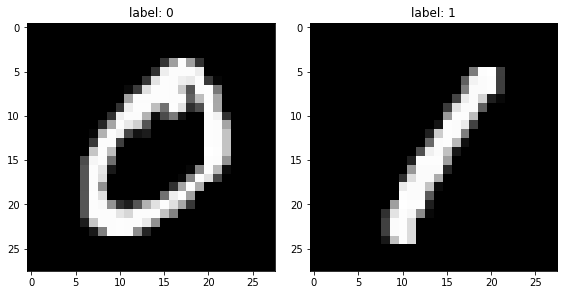

In [28]:
function_result_01("label: 0",im_0,"label: 1",im_1)

## [git commit # 07] % git commit -a -m "complete the function for the function result 01"

In [29]:
def function_result_02(title,data):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(data, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

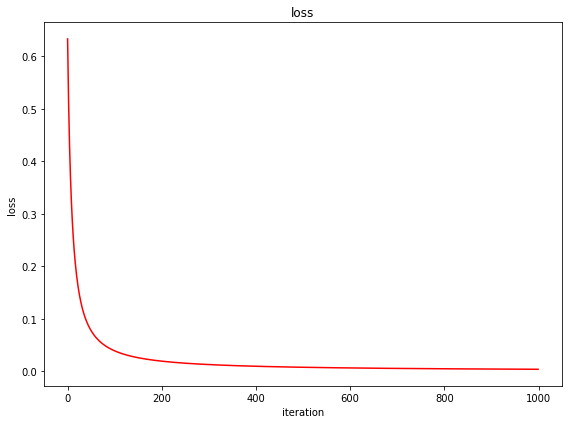

In [30]:
function_result_02('loss',loss_iteration)

## [git commit # 08] % git commit -a -m "complete the function for the function result 02"

In [33]:
def function_result_03(title,data):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(data, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('prediction')

    plt.tight_layout()
    plt.show()

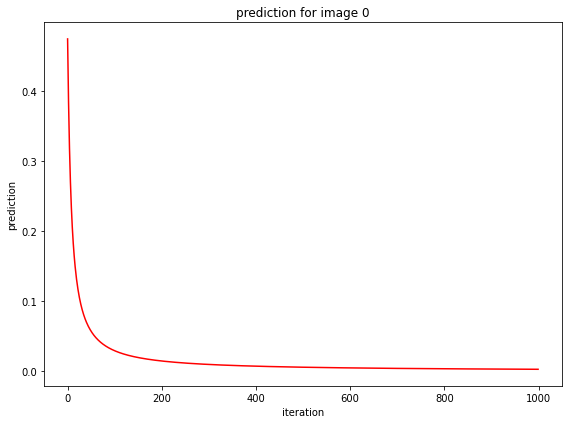

In [34]:
function_result_03('prediction for image 0',pred_0_iteration)

## [git commit # 09] % git commit -a -m "complete the function for the function result 03"

In [36]:
def function_result_04(title,data):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(data, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('prediction')

    plt.tight_layout()
    plt.show()

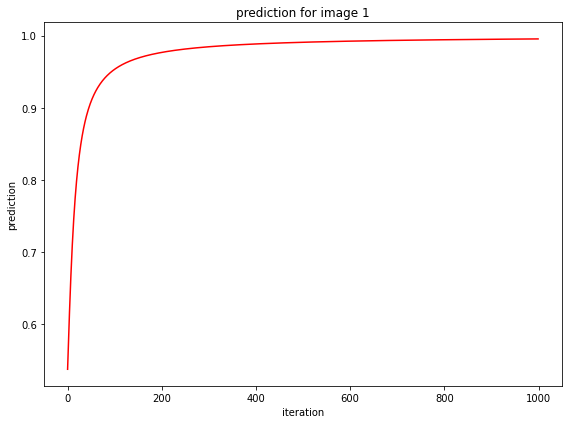

In [37]:
function_result_04('prediction for image 1',pred_1_iteration)

## [git commit # 10] % git commit -a -m "complete the function for the function result 04"

In [38]:
def function_result_05(data):
    iter_data = [0,100,200,300,400,500,600,700,800,900]

    for i in iter_data:
        print('iteration = %4d, loss = %12.10f' % (i, data[i]))

In [39]:
function_result_05(loss_iteration)

iteration =    0, loss = 0.6329350216
iteration =  100, loss = 0.0387987005
iteration =  200, loss = 0.0192110507
iteration =  300, loss = 0.0127217113
iteration =  400, loss = 0.0094994077
iteration =  500, loss = 0.0075760710
iteration =  600, loss = 0.0062989058
iteration =  700, loss = 0.0053894604
iteration =  800, loss = 0.0047090685
iteration =  900, loss = 0.0041809548


## [git commit # 11] % git commit -a -m "complete the function for the function result 05"

In [40]:
def function_result_06(data):
    iter_data = [0,100,200,300,400,500,600,700,800,900]

    for i in iter_data:
        print('iteration = %4d, pred im0 = %12.10f' % (i, data[i]))

In [41]:
function_result_06(pred_0_iteration)

iteration =    0, pred im0 = 0.4751157638
iteration =  100, pred im0 = 0.0294013919
iteration =  200, pred im0 = 0.0147619719
iteration =  300, pred im0 = 0.0098246200
iteration =  400, pred im0 = 0.0073549633
iteration =  500, pred im0 = 0.0058749365
iteration =  600, pred im0 = 0.0048896397
iteration =  700, pred im0 = 0.0041867921
iteration =  800, pred im0 = 0.0036602851
iteration =  900, pred im0 = 0.0032512118


## [git commit # 12] % git commit -a -m "complete the function for the function result 06"

In [42]:
def function_result_07(data):
    iter_data = [0,100,200,300,400,500,600,700,800,900]

    for i in iter_data:
        print('iteration = %4d, pred im1 = %12.10f' % (i, data[i]))

In [43]:
function_result_07(pred_1_iteration)

iteration =    0, pred im1 = 0.5372495936
iteration =  100, pred im1 = 0.9533672143
iteration =  200, pred im1 = 0.9767250520
iteration =  300, pred im1 = 0.9845503666
iteration =  400, pred im1 = 0.9884505421
iteration =  500, pred im1 = 0.9907828605
iteration =  600, pred im1 = 0.9923333612
iteration =  700, pred im1 = 0.9934382832
iteration =  800, pred im1 = 0.9942653695
iteration =  900, pred im1 = 0.9949076094


## [git commit # 13] % git commit -a -m "complete the function for the function result 07"

---

# RESULTS

---

## # 01. plot the input images (left: image 0, right: image 1)

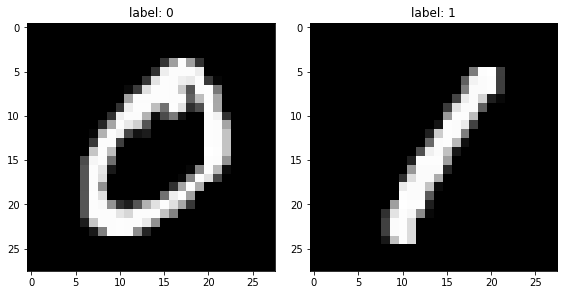

In [44]:
function_result_01("label: 0",im_0,"label: 1",im_1)

## # 02. plot the loss curve (x-axis: iteration, y-axis: loss)

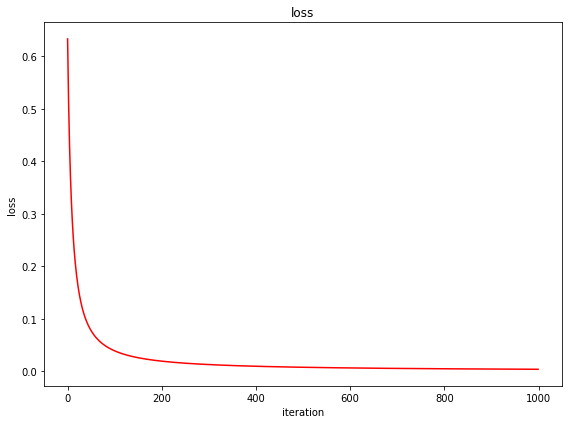

In [45]:
function_result_02('loss',loss_iteration)

## # 03. plot the prediction value for image 0 (x-axis: iteration, y-axis: prediction)

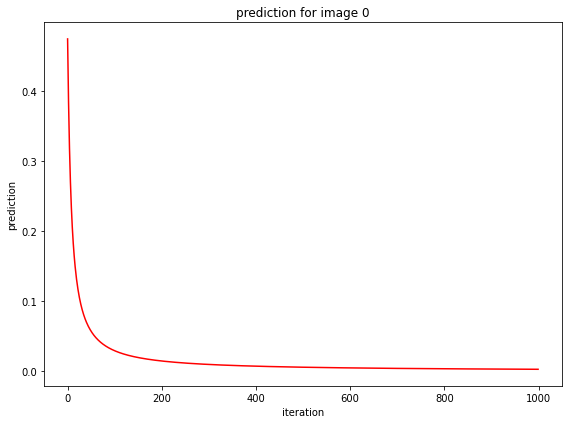

In [46]:
function_result_03('prediction for image 0',pred_0_iteration)

## # 04. plot the prediction value for image 1 (x-axis: iteration, y-axis: prediction)

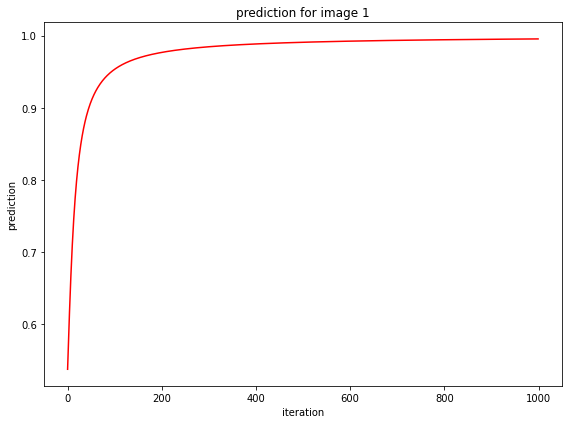

In [47]:
function_result_04('prediction for image 1',pred_1_iteration)

## # 05. print the loss values at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [48]:
function_result_05(loss_iteration)

iteration =    0, loss = 0.6329350216
iteration =  100, loss = 0.0387987005
iteration =  200, loss = 0.0192110507
iteration =  300, loss = 0.0127217113
iteration =  400, loss = 0.0094994077
iteration =  500, loss = 0.0075760710
iteration =  600, loss = 0.0062989058
iteration =  700, loss = 0.0053894604
iteration =  800, loss = 0.0047090685
iteration =  900, loss = 0.0041809548


## # 06. print the prediction values for image 0 at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [49]:
function_result_06(pred_0_iteration)

iteration =    0, pred im0 = 0.4751157638
iteration =  100, pred im0 = 0.0294013919
iteration =  200, pred im0 = 0.0147619719
iteration =  300, pred im0 = 0.0098246200
iteration =  400, pred im0 = 0.0073549633
iteration =  500, pred im0 = 0.0058749365
iteration =  600, pred im0 = 0.0048896397
iteration =  700, pred im0 = 0.0041867921
iteration =  800, pred im0 = 0.0036602851
iteration =  900, pred im0 = 0.0032512118


## # 07. print the prediction values for image 1 at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [50]:
function_result_07(pred_1_iteration)

iteration =    0, pred im1 = 0.5372495936
iteration =  100, pred im1 = 0.9533672143
iteration =  200, pred im1 = 0.9767250520
iteration =  300, pred im1 = 0.9845503666
iteration =  400, pred im1 = 0.9884505421
iteration =  500, pred im1 = 0.9907828605
iteration =  600, pred im1 = 0.9923333612
iteration =  700, pred im1 = 0.9934382832
iteration =  800, pred im1 = 0.9942653695
iteration =  900, pred im1 = 0.9949076094
